# Face detection with python and OpenCV 

Tutorial from : https://www.datacamp.com/community/tutorials/face-detection-python-opencv

## Intro

In [205]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [206]:
img_raw = cv2.imread('./data/image.jpg')

In [207]:
type(img_raw)

numpy.ndarray

In [208]:
img_raw.shape

(288, 288, 3)

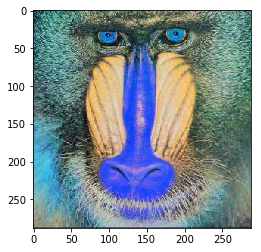

In [209]:
plt.imshow(img_raw)

OpenCV and matplotlib have different orders of primary colors. Whereas OpenCV reads images in the form of BGR, matplotlib, on the other hand, follows the order of RGB. Thus, when we read a file through OpenCV, we read it as if it contains channels in the order of blue, green and red.

However, when we display the image using matplotlib, the red and blue channel gets swapped and hence the blue tinge. 

To avoid this issue, we will transform the channel to how matplotlib expects it to be using the cvtColor function.

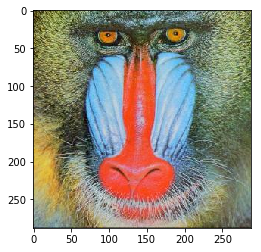

In [210]:
img_rgb = cv2.cvtColor(img_raw, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

## Face detection

In [211]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

cv2.__version__

'4.0.0'

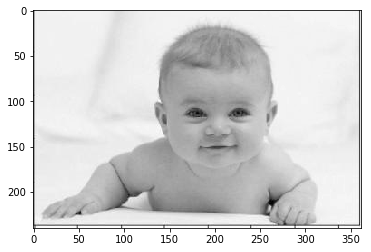

In [212]:
#Loading the image to be tested
test_image = cv2.imread('./data/baby4.jpg')

#Converting to grayscale
test_image_gray = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)

# Displaying the grayscale image
plt.imshow(test_image_gray, cmap='gray')

Since we know that OpenCV loads an image in BGR format, so we need to convert it into RBG format to be able to display its true colors. Let us write a small function for that.

In [213]:
def convertToRGB(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

OpenCV comes with a lot of pre-trained classifiers. For instance, there are classifiers for smile, eyes, face, etc. Let's load the classifier for frontal face.

In [214]:
haar_cascade_face = cv2.CascadeClassifier('./data/haarcascades/haarcascade_frontalface_alt2.xml')

# haar_cascade_face = cv2.CascadeClassifier("data/haarcascades/haarcascade_frontalface_alt.xml")

In [215]:
faces_rects = haar_cascade_face.detectMultiScale(test_image_gray, scaleFactor = 1.2, minNeighbors = 5)

In [216]:
# Let us print the no. of faces found
print('Faces found: ', len(faces_rects))

Faces found:  1


In [217]:
for (x,y,w,h) in faces_rects:
     cv2.rectangle(test_image, (x, y), (x+w, y+h), (0, 255, 0), 2)

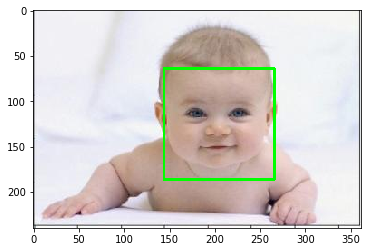

In [218]:
#convert image to RGB and show image
plt.imshow(convertToRGB(test_image))

Let us now create a generalized function for the entire face detection process.

In [ ]:
def detect_faces(cascade, test_image, scaleFactor = 1.1):
    # create a copy of the image to prevent any changes to the original one.
    image_copy = test_image.copy()

    #convert the test image to gray scale as opencv face detector expects gray images
    gray_image = cv2.cvtColor(image_copy, cv2.COLOR_BGR2GRAY)

    # Applying the haar classifier to detect faces
    faces_rect = cascade.detectMultiScale(gray_image, scaleFactor=scaleFactor, minNeighbors=5)

    for (x, y, w, h) in faces_rect:
        cv2.rectangle(image_copy, (x, y), (x+w, y+h), (0, 255, 0), 15)

    return image_copy

Let's test the function on new image.